## Zadanie domowe 3 - Jakub Kuśmierski

### Inicjalizacja środowiska

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

Trening modelu z jednym neuronem, z liniową funkcją aktywacji, który odtworzy współczynniki trójmianu:
<br></br>
$$
\huge{
  -2 + 3x + 2x^{2}
}
$$
<br></br>

### Definicja funkcji

In [2]:
#Function to generate data
def getData(nPoints):
    x = tf.random.uniform((nPoints, 1), -10, 10)
    x = np.hstack([x,x**2])
    coefficients = np.array([2,3])
    y = np.sum(coefficients*x, axis=1) - 2
    return x, y

#Model definition
def getModel(nInputs, nHidenNeurons, nOutputNeurons, lr):
    inputs = tf.keras.Input(shape=(nInputs,), name="features")
    iLayer = 1
    layer = tf.keras.layers.Dense(nHidenNeurons, name="layer_{}".format(iLayer))(inputs)
    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.MeanSquaredError(), metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])
    return model

#Function to plot training history
def plotTrainHistroy(histroy):
    fig, axis = plt.subplots(1, 2, figsize=(20, 5))
    axis[0].plot(histroy.history['loss'], label='loss')
    axis[0].set_xlabel('Epoch')
    axis[0].set_ylabel('Error')
    axis[0].legend()
    axis[1].plot(histroy.history['loss'], label='loss')
    axis[1].set_yscale('log')
    axis[1].set_xlabel('Epoch')
    axis[1].set_ylabel('Error')
    axis[1].legend()
    pass

#Function to plot comparison between true and predicted data
def plotPrediction(y_pred, data, y):
    fig, axis = plt.subplots(1, 2, figsize=(10, 5))
    axis[0].scatter(data[:,0], y, label='True data')
    axis[0].scatter(data[:,0], y_pred, label='Predicted data')
    axis[0].set_xlabel('x')
    axis[0].set_ylabel('y')
    axis[0].legend()
    axis[1].hist((y-y_pred[:,0])/y, bins=np.linspace(-0.01, 0.01, 11))
    axis[1].legend()
    axis[1].set_xlabel("(true - model)/true")
    pass



### Trening modelu

In [3]:
#Data generation
nPoints = 1000
data, y = getData(nPoints)

#model preparation
nInputs = 2
nHidenNeurons = 1
nOutputNeurons = 1
nepochs = 200
batch_size = 32
initial_learning_rate = 1E-1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=3,
                                            min_delta=1E-100,
                                            verbose = 1)



model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)
model.summary()

#Model training
history = model.fit(data, y, epochs=nepochs, batch_size=batch_size, verbose=0, callbacks=[callback])
y_pred = model.predict(data)



2025-03-25 20:31:53.686401: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-25 20:31:53.686424: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-25 20:31:53.686429: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-25 20:31:53.686443: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-25 20:31:53.686455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ features (InputLayer)           │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

2025-03-25 20:31:53.931486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-03-25 20:31:53.932884: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Epoch 56: early stopping
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


### Ewaluacaja funkcji straty

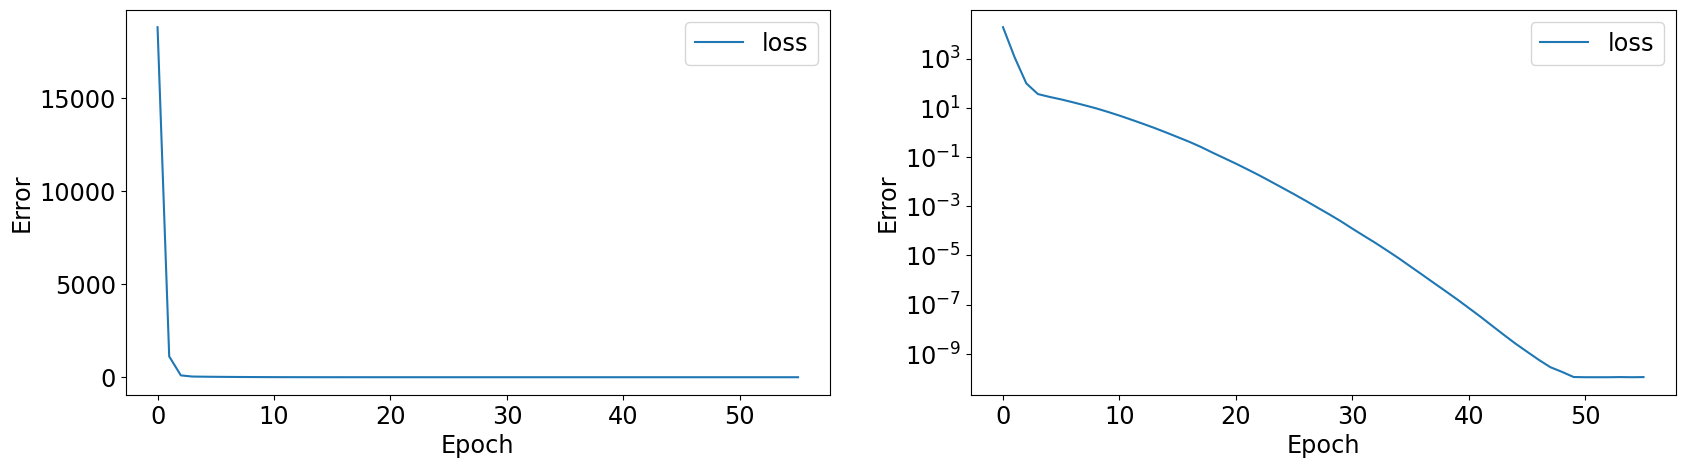

In [4]:
plotTrainHistroy(history)

### Porównanie danych testowych i predykcji modelu

/var/folders/0q/wbzln3c97rq2wyq7grftyjjm0000gn/T/ipykernel_52572/682485026.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis[1].legend()


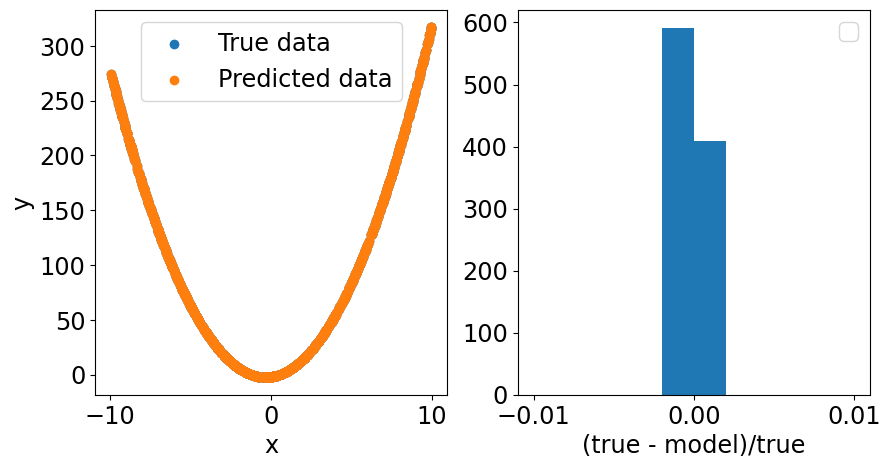

In [5]:
plotPrediction(y_pred, data, y)

### Wypisanie wag modelu

In [6]:
print(colored('Model weights layer_0: \n', 'blue'), model.get_layer('layer_1').get_weights()[0])
print(colored('Model weights output: \n', 'blue'), model.get_layer('output').get_weights()[0])
true_weight = model.get_layer('layer_1').get_weights()[0] * model.get_layer('output').get_weights()[0]
print(colored('layer_0 * output = \n', 'blue'), true_weight)
print(colored('Bias layer_0', 'blue'), model.get_layer('layer_1').get_weights()[1])
print(colored('Bias output', 'blue'), model.get_layer('output').get_weights()[1])
total_bias = model.get_layer('layer_1').weights[1].numpy() *  model.get_layer('output').weights[0].numpy() + model.get_layer('output').weights[1].numpy()
print(colored('Total bias: ', 'blue'), total_bias)

Model weights layer_0: 
 [[1.1419486]
 [1.7129225]]
Model weights output: 
 [[1.7513926]]
layer_0 * output = 
 [[2.0000002]
 [2.9999998]]
Bias layer_0 [-1.791814]
Bias output [1.1381813]
Total bias:  [[-1.9999884]]


In [7]:
print(colored('Otrzymane równanie z modelu ma postać: ', 'green'), 
      colored('y ', 'red'), '= ', round(true_weight[0,0], 1), '*', 
      colored('x^2', 'red'), '+', round(true_weight[1,0], 1), '*', 
      colored('x', 'red'), '+', round(total_bias[0,0],1))

Otrzymane równanie z modelu ma postać:  y  =  2.0 * x^2 + 3.0 * x + -2.0


Interpretacja: Jak widać z dobrym przyblieniem wagi modelu pokrywają się z wartościami współczynników dwumianu